# Newton Root-Finding, LU Factorization, SVD
#### Oct. 2019

## 1a)
In order to find four points $b \in {\rm I\!R}^2$ such that $||b||_2 = 1$ $||Ab||_2 = 1$, we do the following:

Find the 2-norm of $b$ and $Ab$ analytically, recognizing that that they are both in $R^2$.

$b$ can be represented as:

$$
    \left(
        \begin{array}{cc}
            b_1 \\
            b_2
        \end{array} \right)
$$

which (including the constraint provided) gives the following equation for the two-norm of $b$:

$\sqrt{b_1^2 + b_2^2} = 1$

The 2-norm of $Ab$ is also equal to 1, and can be represented as:


$$
    \left(
        \begin{array}{cc}
            3 & -1 \\
            1 & 0
        \end{array} \right)
        %
    \left(
        \begin{array}{cc}
            b_1 \\
            b_2
        \end{array} \right)
        %
     \mathbf{=} \left(
        \begin{array}{cc}
            3b_1 - b_2 \\
            b_1
        \end{array} \right)  
$$

This gives the equation: 

$\sqrt{(3b_1 - b_2)^2 + b_1^2} = 1$

Since both norms equal 1, we can set them equal to each other to produce:

$\sqrt{(3b_1 - b_2)^2 + b_1^2} = \sqrt{b_1^2 + b_2^2}$

which is equivalent to:

$(3b_1 - b_2)^2 + b_1^2 = b_1^2 + b_2^2$


So we have $9b_1^2 - 6b_1b_2 = 0$, which reduces to $b_1 = \frac{2}{3}b_2$.

Taking the case when $b_1 = 0$, we plug back into the $b$ two-norm equation to find $b_2$:

$0 + b_2^2 = 1$

So we have that $b_2 = \pm \sqrt{1}$ in the case $b_1 = 1$.


Taking the case when $b_1 \neq 1$, the equation $9b_1^2 - 6b_1b_2 = 0$ becomes $b_1 = \frac{2}{3}b_2$, which we plug back into the $b$ norm equation. This gives $\frac{2}{3}b_2^2 + b_2^2 = 1$, which simplifies to $b_2 = \pm \sqrt{\frac{9}{13}}$. So we have $b_1 = \frac{2}{3}b_2 = \frac{2}{3}\pm \sqrt{\frac{9}{13}}$.

So the four points we have are:

$b_1, b_2 = (0, \sqrt{1})$

$b_1, b_2 = (0, -\sqrt{1})$

$b_1, b_2 = (\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$

$b_1, b_2 = (-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$


The two curves are given by the equations we found above: 

$\sqrt{b_1^2 + b_2^2} = 1$

and

$\sqrt{(3b_1 - b_2)^2 + b_1^2} = 1$

So we can plot them as $ b_2 = \pm \sqrt{1 - b_1^2} $ and $b_2 = 3b_1 \pm \sqrt{1-b_1^2}$. 

See below for a plot with these two curves, as well as all four points $b$:


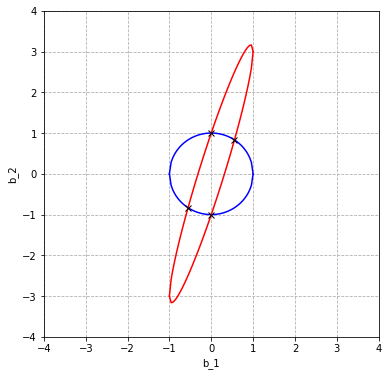

In [138]:
import numpy as np
import matplotlib.pyplot as plt

pts = np.linspace(-1,1,50)

plt.figure(figsize=(6,6))
plt.plot(pts, +np.sqrt(1-pts**2), 'b')
plt.plot(pts, -np.sqrt(1-pts**2), 'b')

plt.plot(pts, 3*pts-np.sqrt(1-(pts**2)), 'r')
plt.plot(pts, 3*pts+np.sqrt(1-(pts**2)), 'r')
plt.plot(0, +np.sqrt(1), 'x', color='black')
plt.plot(0, -np.sqrt(1), 'x', color='black')
plt.plot(2/np.sqrt(13), 3/np.sqrt(13), 'x', color='black')
plt.plot(-2/np.sqrt(13), -3/np.sqrt(13), 'x', color='black')
plt.axis(xmin=-4, xmax=4, ymin=-4, ymax=4)

plt.grid(linestyle='--')
plt.xlabel("b_1")
plt.ylabel("b_2")
plt.show()



## 1b)
Now we consider the infinity norm case. We first consider the first constraint $||c||_\infty = 1$, which we can think of as:

$\text{max}(|c_1|, |c_2|) = 1$ 

where $c_1$ adn $c_2$ are the two components of $c$. This represents four situations:

(1) When $c_1 = +1$, $-1 \leq c_2 \leq +1$

(2) When $c_1 = -1$, $-1 \leq c_2 \leq +1$

(3) When $c_2 = +1$, $-1 \leq c_1 \leq +1$

(4) When $c_2 = -1$, $-1 \leq c_1 \leq +1$


Now we consider the second constraint $||Ac||_\infty = 1$, which we can think of (drawing on our experience from part A) as:

$\text{max}(|3c_1-c_2|, |c_2|) = 1$ 

Thinking of situations (1) and (2) from above (since any given $c_1$ and $c_2$ must satisfy both constraints), we have four corresponding situations:

When $c_1 = +1$:

(a) $3(1) - c_2 \leq 1$

(b) $3(1) - c_2 \geq -1$


When $c_1 = -1$:

(c) $3(-1) - c_2 \leq 1$

(d) $3(-1) - c_2 \geq -1$

*Note that the two pairs of equations are due to the presence of the absolute value function. We must test for the positive and negative cases, to ensure the magnitude of the term inside the absolute value signs is below +1 and above -1. 

Solving these four equations for $c_2$ gives the following constraints:

$2 \leq c_2 \leq 4$

$-4 \leq c_2 \leq -2$

But neither of these situations allow $c_2$ to satisfy the constraint $||c||_\infty = 1$, so these are not pathways to solutions. 

We therefore disregard them.

So we now consider situations (3) and (4) from above and the four corresponding situations:

When $c_2 = +1$:

(e) $3c_1 - (1) \leq 1$

(f) $3c_1 - (1) \geq -1$

When $c_2 = -1$:

(e) $3c_1 - (-1) \leq 1$

(f) $3c_1 - (-1) \geq -1$

Solving these four equations for $c_1$ gives the following:

$c_1, c_2 = (\frac{2}{3}, 1)$

$c_1, c_2 = (-\frac{2}{3}, -1)$

$c_1, c_2 = (0, 1)$

$c_1, c_2 = (0, -1)$

Each of these points can also satisfy our first constraint, so these are our four solutions!

The eight lines (four for $||c||_\infty$ and four for $||Ac||_\infty$) are given by the equations from the norm: 

For $||c||_\infty$:

$c_1 = 1$, on interval $c_2 \in [-1, +1]$

$c_1 = -1$, on interval $c_2 \in [-1, +1]$

$c_2 = 1$, on interval $c_1 \in [-1, +1]$

$c_2 = -1$, on interval $c_1 \in [-1, +1]$

and

For $||Ac||_\infty$:

$c_1 = 1$, on interval $c_2 \in [2, 4]$

$c_1 = -1$, on interval $c_2 \in [-4, -2]$

$c_2 = 3c_1 - 1$, on interval $c_1 = [-1, +1]$

$c_2 = 3c_1 + 1$, on interval $c_1 = [-1, +1]$
 
See below for a plot with these two "curves", as well as all four points $c$:

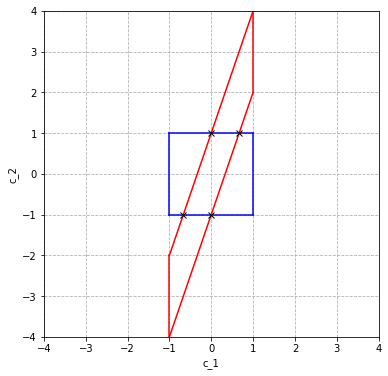

In [139]:
pts = np.linspace(-1, 1, 50)

c1_a = 1
c1_b = -1
c2_a = 1
c2_b = -1

plt.figure(figsize=(6,6))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.plot([-1,1], [1,1], 'b')
plt.plot([1,1], [-1,1], 'b')
plt.plot([-1,-1], [-1,1], 'b')
plt.plot([1,-1], [-1,-1], 'b')

plt.plot([-1,-1], [-4, -2], 'r')
plt.plot([1,1], [2, 4], 'r')
plt.plot(pts,3*pts - 1, 'r')
plt.plot(pts, 3*pts + 1, 'r')

plt.plot(2/3, 1, 'x', color='black')
plt.plot(-2/3, -1, 'x', color='black')
plt.plot(0, 1, 'x', color='black')
plt.plot(0, -1, 'x', color='black')

plt.grid(linestyle='--')
plt.xlabel("c_1")
plt.ylabel("c_2")
plt.show()

## 1c)

The core of Newton's method is given by $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. So the vector generalization of the Newton root finding method is:

$ v_{n+1} = v_n -$ $\bf{J^{-1}}$$f(d)$

So for our current case, we have:

$$
f(d) = 
    \left(
        \begin{array}{cc}
            ||d||_4 -1 \\
            ||Ad||_4 -1
        \end{array} \right)
    %
    =
    \left(
        \begin{array}{cc}
            (x^4 + y^4)^{\frac{1}{4}} - 1 \\
            ((3x - y)^4 + x^4)^{\frac{1}{4}} - 1
        \end{array} \right)
$$

Now we write the Jacobian of $f(d)$:

$$
\mathbf{J} = 
    \left(
        \begin{array}{cc}
            x^3(x^4 + y^4)^{\frac{-3}{4}} & y^3(x^4 + y^4)^{\frac{-3}{4}} \\
            (x^3 + 3(3x-y)^3)((3x-y)^4 + x^4)^{\frac{-3}{4}} & -(3x-y)^3((3x-y)^4 + x^4)^{\frac{-3}{4}}
        \end{array} \right)
$$

where $x = d_1$ and $y = d_2$.
    

So we now can code up the program to find solutions based on the vector generalization of Newton's method. See below:

In [140]:
def newtons_vec_method(a, b, iterations, tol):
    v_n = np.array([[a],[b]])
    #print('v_n shape', v_n.shape)

    for i in range(iterations):
        
        old_guess = v_n
        
        x = v_n[0]
        y = v_n[1]
        
        fd_top = (x**4 + y**4)**(1/4) - 1
        fd_bottom = ((3*x - y)**4 + x**4)**(1/4) - 1
        
        #print('fd_top shape', fd_top.shape)
        #print('fd_bottom shape', fd_bottom.shape)
        
        fd = np.array([fd_top,fd_bottom])
        
        #print('fd shape', fd.shape)
        
        df1dx = (x**3)*(x**4 + y**4)**(-3/4)
        df1dy = (y**3)*(x**4 + y**4)**(-3/4)
        
        df2dx = (x**3 + 3*(3*x-y)**3)*((3*x-y)**4 + x**4)**(-3/4)
        df2dy = (-(3*x-y)**3)*((3*x-y)**4 + x**4)**(-3/4)
        
        #print('df1dx shape', df1dx.shape)
        #print('df1dy shape', df1dy.shape)
        #print('df2dx shape', df2dx.shape)
        #print('df2dy shape', df2dy.shape)
        
        J = np.array([[df1dx, df1dy],[df2dx, df2dy]])
        J = J.reshape((2,2))
        
        #print('J shape', J.shape)
        
        v_n = v_n - np.dot(np.linalg.inv(J), fd)
        
        new_guess = v_n
        
        if np.linalg.norm(old_guess) - np.linalg.norm(new_guess) < tol:
            return v_n
        
    return v_n



Since we need to "prime" Newton's method with a decent guess, we take the four points from the above, and use them. 

In [141]:
pt1 = newtons_vec_method(2/3, 1, 100, 0.0000001)
pt2 = newtons_vec_method(-2/3, -1, 100, 0.0000001)
pt3 = newtons_vec_method(0, 1, 100, 0.0000001)
pt4 = newtons_vec_method(0, -1, 100, 0.0000001)

print("Point 1 is", "\n", pt1)
print('\n')
print("Point 2 is", "\n", pt2)
print('\n')
print("Point 3 is", "\n", pt3)
print('\n')
print("Point 4 is", "\n", pt4)


Point 1 is 
 [[0.63728994]
 [0.95593491]]


Point 2 is 
 [[-0.63728994]
 [-0.95593491]]


Point 3 is 
 [[0.]
 [1.]]


Point 4 is 
 [[ 0.]
 [-1.]]


So the four solutions we find are $(0.64, 0.96)$, $(-0.64, -0.96)$, $(0,1)$ and $(0,-1)$. 

The two curves are given by the equations from found above: 

$(d_1^4 + d_2^4)^{\frac{1}{4}} = 1$

and

$((3d_1 - d_2)^4 + d_1^4)^{\frac{1}{4}} = 1$

So we can plot them as $ d_2 = \pm (1 - d_1^4)^{\frac{1}{4}} $ and $d_2 = 3d_1 \pm (1-d_1^4)^{\frac{1}{4}}$. 

See below for a plot with these two curves, as well as all four points $d$:

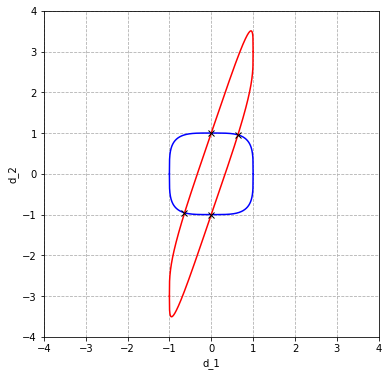

In [142]:
pts = np.linspace(-1, 1, 500)

plt.figure(figsize=(6,6))
plt.xlim((-4,4))
plt.ylim((-4,4))


plt.plot(pts, +(1-pts**4)**(1/4), 'b')
plt.plot(pts, -(1-pts**4)**(1/4), 'b')
plt.plot(pts, 3*pts-(1-(pts**4))**(1/4), 'r')
plt.plot(pts, 3*pts+(1-(pts**4))**(1/4), 'r')


plt.plot(0.64, 0.96, 'x', color='black')
plt.plot(-0.64, -0.96, 'x', color='black')
plt.plot(0, 1, 'x', color='black')
plt.plot(0, -1, 'x', color='black')

plt.grid(linestyle='--')
plt.xlabel("d_1")
plt.ylabel("d_2")
plt.show()

## 1d)

When we plot the points, we see that they appear to lie on the same line. See further below for why this is true.

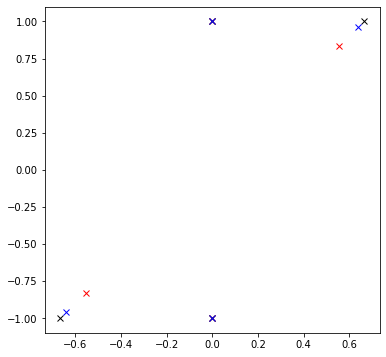

In [143]:

plt.figure(figsize=(6,6))

plt.plot(0, +np.sqrt(1), 'x', color='red')
plt.plot(0, -np.sqrt(1), 'x', color='red')
plt.plot(2/np.sqrt(13), 3/np.sqrt(13), 'x', color='red')
plt.plot(-2/np.sqrt(13), -3/np.sqrt(13), 'x', color='red')

plt.plot(2/3, 1, 'x', color='black')
plt.plot(-2/3, -1, 'x', color='black')
plt.plot(0, 1, 'x', color='black')
plt.plot(0, -1, 'x', color='black')


plt.plot(0.64, 0.96, 'x', color='blue')
plt.plot(-0.64, -0.96, 'x', color='blue')
plt.plot(0, 1, 'x', color='blue')
plt.plot(0, -1, 'x', color='blue')

plt.show()


To understand this, think of the general form of a p-norm for a vector with two components in the case that it equals 1: $(x^p + y^p)^{1/p} = 1$. 

This simplifies to $x^p + y^p = 1$, which we can think of as $f(x) + f(y) = 1$. 

Given our A, we also know that the general form of a p-norm $||Av||_p$ in the case that it equals 1: $((3x-y)^p + x^p)^{1/p} = 1$.

This simplifies to $(3x-y)^p + x^p = 1$, which we can think of as $f(3x-y) + f(x) = 1$.



Taking our two simplified equatinos as a system of equations, we have:

(1) $f(x) + f(y) = 1$

(2) $f(3x-y) + f(x) = 1$

Taking (2) minus (1), we obtain $f(3x-y) - f(y) = 0$, which we simplify to $f(3x-y) = f(y)$. 

Since $f$ here is an even function, we consider both the case where $3x-y = y$ and $3x-y = -y$. 

Simplifying $3x-y = y$ gives the equation for the first line $y = \frac{3}{2}x$, and simplifying $3x-y = -y$ gives the equation for the second line $x=0$. 

When we plot these two straight lines, we see that our 12 points indeed lie on them! See below:

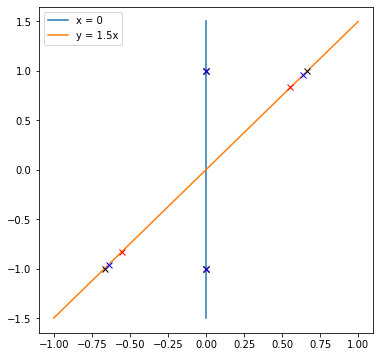

In [144]:
pts = np.linspace(-1, 1, 50)

plt.figure(figsize=(6,6))

plt.plot([0, 0], [-1.5, 1.5], label='x = 0')
plt.plot(pts, (3/2)*pts, label='y = 1.5x')

plt.plot(0, +np.sqrt(1), 'x', color='red')
plt.plot(0, -np.sqrt(1), 'x', color='red')
plt.plot(2/np.sqrt(13), 3/np.sqrt(13), 'x', color='red')
plt.plot(-2/np.sqrt(13), -3/np.sqrt(13), 'x', color='red')

plt.plot(2/3, 1, 'x', color='black')
plt.plot(-2/3, -1, 'x', color='black')
plt.plot(0, 1, 'x', color='black')
plt.plot(0, -1, 'x', color='black')


plt.plot(0.64, 0.96, 'x', color='blue')
plt.plot(-0.64, -0.96, 'x', color='blue')
plt.plot(0, 1, 'x', color='blue')
plt.plot(0, -1, 'x', color='blue')

plt.legend()

plt.show()


## 2a)
See below for the function fsolve that takes a lower triangular matrix $L$ and vector $b$ and returns the solution $x$ to the linear system $Lx = b$ using forward substitution. 

In [115]:
#fsolve for binary
import numpy as np


def fsolve(L, b):

    if np.any(np.diag(L) == 0):
        raise ValueError('Matrix is singular')
    else:
        j = L.shape[0]
        x = np.zeros((j,1),int)
        for row in range(j):
            jth_b = b[row]
            lx_term = 0
            for col in range(row):
                lx_term = (lx_term + ((x[col] * L[row,col])%2))%2
            x[row] = (((jth_b - lx_term) % 2)/L[row,row])%2
        return x

To verify this works, we can run a test to which the know the answer:

In [116]:
#Test binary

L = np.array([[1,0,0,0], [0,1,0,0], [1,1,1,0], [1,0,1,1]])
b_test = np.array([1,1,0,1])
x = fsolve(L,b_test)
print(x)

[[1]
 [1]
 [0]
 [0]]


This is the solution we expected! 

## 2b)
See below for the function rsole that takes an upper triangular matrix $U$ and vector $b$ and returns the solution $x$ to $Ux = b$ using reverse substitution.

In [117]:
#rsolve for binary
import numpy as np

def rsolve(U,b):
    if np.any(np.diag(U) == 0):
        raise ValueError('Matrix is singular')
    else:
        j = U.shape[0]
        x = np.zeros((j,1), int)
        for row in range(j-1, -1, -1):
            jth_b = b[row]
            ux_term = 0
            for col in range(row+1, j):
                ux_term = (ux_term + ((x[col]*U[row,col])%2))%2
            x[row] = (((jth_b - ux_term)%2)/U[row,row])%2
        return x

Again, we run a test to check if it works: 

In [118]:
U = np.array([[1,0,1,0],[0,1,1,1],[0,0,1,0],[0,0,0,1]])
b_test = np.array([1,1,1,1])
x = rsolve(U,b_test)
print(x)

[[0]
 [1]
 [1]
 [1]]


It works!

## 2c)
See below for a program to calculate the LU factorization with partial pivoting. The "if" statement that triggers the break ensures this also works on singular matrices. 

In [148]:
#Binary program for calculating the 
#LU factorization with partial pivoting


def partialpivot(A):
    n = A.shape[0]
    U = np.copy(A)
    P = np.identity(n, dtype=float)
    L = np.identity(n, dtype=float)
    
    for j in range(n-1):
        
        i = 0

        temp_col = U[j:n,j]
        maxpos = np.argmax(np.abs(temp_col))
        
        max_location = maxpos+j

        if U[j,j] != U[max_location,j]:
            U[[j, max_location],j:] = U[[max_location, j],j:]
            L[[j, max_location],0:j] = L[[max_location, j],0:j]
            P[[j, max_location],:] = P[[max_location, j],:]
        
        for i in range(j+1,n):
            
            #Need this line to ensure function works for a singular matrix
            if U[j,j] == 0:
                break
                
            L[i,j] = (U[i,j]/U[j,j])%2
            for k in range(j,n):
                U[i,k] = (U[i,k] + ((L[i,j]*U[j,k])%2))%2
                
    return P, L, U



Below we run a test to see if it works. 

Note that we also create a bin_mul that implement matrix multiplication for the binary case. 

In [120]:
import sys

def bin_mul(A,x): 
    # Check for dimensional compatibility
    m,n=A.shape[0], A.shape[0]
    nn, p = b.shape[0], x.shape[1]
    if n!=nn:
        print("There is a mismatch in input dimensions")
        sys.exit()

    z=np.zeros((m,p),dtype=np.float64)

    # Use %2 to make + and * operations work for the binary case. 
    for i in range(m):
        for j in range(p):
            for k in range(n):
                z[i,j]=(z[i,j]+((A[i,k]*x[k,j])%2))%2
    return z

A = np.array([[1,0,1,0], [0,1,1,1], [1,1,1,1], [1,0,0,1]])
b = np.array([1,1,0,1])

P, L, U = partialpivot(A)

# Check if our P, L, and U matrices take the expected form:
print("P is \n", P)
print("L is \n", L)
print("U is \n", U)

# Check if PA == LU, which we know must be the case. 
PA_test = bin_mul(P, A)
LU_test = bin_mul(L, U)
print(PA_test == LU_test)

Pb = bin_mul(P, b.reshape([-1,1]))

print(Pb)

P is 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L is 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]]
U is 
 [[1 0 1 0]
 [0 1 1 1]
 [0 0 1 0]
 [0 0 0 1]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[1.]
 [1.]
 [0.]
 [1.]]


The tests work, so our partial pivot function is good to go. We will see in problem (3c) that our check for singular matrices also functions effectively. 

## 2d) 
Now we find the solution $x$ in $ax = b$ for the two binary matrices provided in the homework files.

In [121]:
A_small = np.loadtxt(open("q2_small_a.txt", 'rb'), delimiter= ' ')
b_small = np.loadtxt(open("q2_small_b.txt", 'rb'), delimiter= ' ')
A_small.astype(float)
b_small.astype(float)

A_large = np.loadtxt(open("q2_large_a.txt", 'rb'), delimiter=' ')
b_large = np.loadtxt(open("q2_large_b.txt", 'rb'), delimiter=' ')

# Note that we can actually use np.dot here (instead of our coded 
# bin_mul), since we are using %2 on all the operations on the inputs
# and outputs of np.dot.
P_small, L_small, U_small = partialpivot(A_small)
y_small = fsolve(L_small, np.dot(P_small, b_small))
x_small = rsolve(U_small, y_small)

P_large, L_large, U_large = partialpivot(A_large)
y_large = fsolve(L_large, np.dot(P_large, b_large))
x_large = rsolve(U_large, y_large)


print("The solution x to the small lineear system is:", "\n", x_small)
print("\n")
print("The solution x to the large linear system is:", "\n", x_large)

The solution x to the small lineear system is: 
 [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


The solution x to the large linear system is: 
 [[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


## 3a)
First we hard-code the binary matrix $A$ according to the pattern we identify when we map out some of the $A$ columns manually:

In [152]:
A = np.zeros((49,49))
np.fill_diagonal(A, 1)
np.fill_diagonal(A[1:], 1)
np.fill_diagonal(A[:,1:], 1)
np.fill_diagonal(A[7:], 1)
np.fill_diagonal(A[:,7:], 1)

A[7,6] = 0
A[6,7] = 0

A[14, 13] = 0
A[13, 14] = 0

A[21,20] = 0
A[20,21] = 0

A[28,27] = 0
A[27,28] = 0

A[35, 34] = 0
A[34,35] = 0

A[42, 41] = 0
A[41, 42] = 0

print(A)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]


Then we generalize this process for any $m x n$ matrix:

In [123]:
def matrix_generator(m,n):
    A = np.zeros((m*n, m*n))
    np.fill_diagonal(A, 1)
    np.fill_diagonal(A[1:], 1)
    np.fill_diagonal(A[:,1:], 1)
    np.fill_diagonal(A[n:], 1)
    np.fill_diagonal(A[:,n:], 1)
    
    for i in range(n, m*n, n):
        A[i, i-1] = 0
        A[i-1, i] = 0
        
    return A



We can check to see if our two matrices are the same, to verify the generator works:

In [124]:
#Test out my matrix generator
test1 = matrix_generator(7,7)
np.unique(A == test1)


array([ True])

It works!

## 3b)
Now, implement the binary LU solver from Q2 and the matrix A to determine the correct presses for each of the given board patterns.

In [125]:
import matplotlib.pyplot as plt

b1 = np.array([0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0])

#As described above, we can use np.dot here instead of bin_mul, given our mod 2 configurations
# in our fsolve and partial pivot functions
P_A, L_A, U_A = partialpivot(A)
y_b1 = fsolve(L_A, np.dot(P_A, b1))
x_b1 = rsolve(U_A, y_b1)


The correct presses for the first light pattern are mapped below:


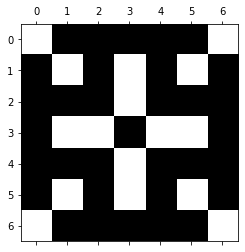

In [126]:
def board_maker(lst, n):
    for i in range(0, len(lst), n):  
        yield lst[i:i + n] 

def x_cleaner(x):
    x_T = x.T
    x_list_full = x_T.tolist()
    x_list = x_list_full[0]
    return x_list
    
x_b1_list = x_cleaner(x_b1)

b1_soln = list(board_maker(x_b1_list, 7))

print("The correct presses for the first light pattern are mapped below:")
plt.spy(b1_soln)

The correct presses for the second light pattern are mapped below:


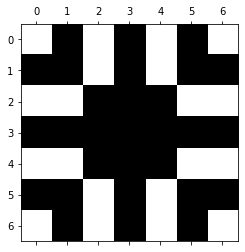

In [127]:
b2 = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0])

P_A, L_A, U_A = partialpivot(A)
y_b2 = fsolve(L_A, np.dot(P_A, b2))
x_b2 = rsolve(U_A, y_b2)

print("The correct presses for the second light pattern are mapped below:")
x_b2_list = x_cleaner(x_b2)

b2_soln = list(board_maker(x_b2_list, 7))
plt.spy(b2_soln)

The correct presses for the third light pattern are mapped below:


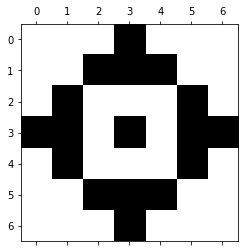

In [128]:
b3 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

P_A, L_A, U_A = partialpivot(A)
y_b3 = fsolve(L_A, np.dot(P_A, b3))
x_b3 = rsolve(U_A, y_b3)

x_b3_list = x_cleaner(x_b3)

print("The correct presses for the third light pattern are mapped below:")
b3_soln = list(board_maker(x_b3_list, 7))
plt.spy(b3_soln)

The correct presses for the fourth light pattern are mapped below:


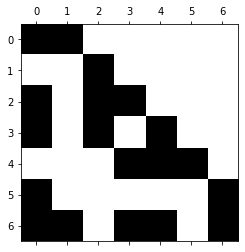

In [129]:
b4 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])

P_A, L_A, U_A = partialpivot(A)
y_b4 = fsolve(L_A, np.dot(P_A, b4))
x_b4 = rsolve(U_A, y_b4)

x_b4_list = x_cleaner(x_b4)

print("The correct presses for the fourth light pattern are mapped below:")
b4_soln = list(board_maker(x_b4_list, 7))
plt.spy(b4_soln)

The correct presses for the fifth light pattern are mapped below:


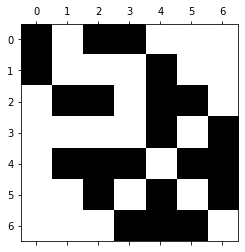

In [130]:
b5 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

P_A, L_A, U_A = partialpivot(A)
y_b5 = fsolve(L_A, np.dot(P_A, b5))
x_b5 = rsolve(U_A, y_b5)

x_b5_list = x_cleaner(x_b5)

print("The correct presses for the fifth light pattern are mapped below:")
b5_soln = list(board_maker(x_b5_list, 7))
plt.spy(b5_soln)

The light pattern I designed is:


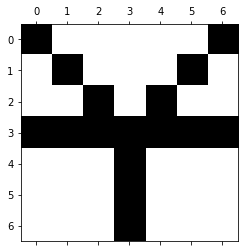

In [131]:
b_mydesign = np.array([1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0])

print("The light pattern I designed is:")
mydesign = list(board_maker(b_mydesign, 7))
plt.spy(mydesign)

The correct presses for the light pattern I designed are mapped below:


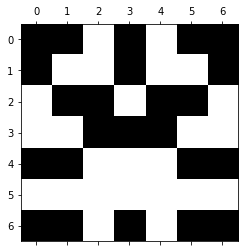

In [132]:
P_A, L_A, U_A = partialpivot(A)
y_bmine = fsolve(L_A, np.dot(P_A, b_mydesign))
x_bmine = rsolve(U_A, y_bmine)

x_bmine_list = x_cleaner(x_bmine)

print("The correct presses for the light pattern I designed are mapped below:")
bmine_soln = list(board_maker(x_bmine_list, 7))
plt.spy(bmine_soln)

## 3c)
The matrix generator allows us to use the values $m$ and $n$ to produce a square matrix $A$ for every $m$ x $n$ grid. We can then find the dimension of the null space for each $m$ x $n$ grid by finding the number of zeroes along the diagonal of the $U$ matrix that the partialpivot function produces when applied to $A$. 


In [133]:
for m in range(1,10):
    for n in range(1,10):
        A = matrix_generator(m,n)
        P, L, U = partialpivot(A)
        U_diag = np.diag(U)
        nullspace_dim = np.sum(U_diag == 0)
        print("The dimension of the null space for a {}x{} matrix is {}.".format(m, n, nullspace_dim))
        

The dimension of the null space for a 1x1 matrix is 0.
The dimension of the null space for a 1x2 matrix is 1.
The dimension of the null space for a 1x3 matrix is 0.
The dimension of the null space for a 1x4 matrix is 0.
The dimension of the null space for a 1x5 matrix is 1.
The dimension of the null space for a 1x6 matrix is 0.
The dimension of the null space for a 1x7 matrix is 0.
The dimension of the null space for a 1x8 matrix is 1.
The dimension of the null space for a 1x9 matrix is 0.
The dimension of the null space for a 2x1 matrix is 0.
The dimension of the null space for a 2x2 matrix is 0.
The dimension of the null space for a 2x3 matrix is 2.
The dimension of the null space for a 2x4 matrix is 0.
The dimension of the null space for a 2x5 matrix is 1.
The dimension of the null space for a 2x6 matrix is 0.
The dimension of the null space for a 2x7 matrix is 2.
The dimension of the null space for a 2x8 matrix is 0.
The dimension of the null space for a 2x9 matrix is 1.
The dimens

## 4a)
I write a function generate_g that returns $G_n$ of the form:

\begin{equation*}
    G_n =
    \begin{bmatrix}
    1 & 0 & 0 & 0 & \ldots & 1 \\
    -1 & 1 & 0 & 0 & \ldots & 1 \\
    -1 & -1 & 1 & 0 & \ldots & 1 \\
    -1 & -1 & -1 & 1 & \ldots & 1 \\
    \vdots & & & & \ddots & \vdots \\
    -1 & -1 & -1 & -1 & -1 & -1 
    \end{bmatrix}
\end{equation*}

In [153]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

def generate_g(n):
    G_n = np.zeros((n,n))
    np.fill_diagonal(G_n, 1)
    G_n[:, n-1] = 1
    
    neg_ones_array = np.ones((n,n)) * -1
    neg_ones_ltril = np.tril(neg_ones_array, k=-1)
    
    G_n = G_n + neg_ones_ltril
    
    return G_n


Test the function to verify it returns the correct $G_n$:

In [40]:
test = generate_g(5)
print(test)

[[ 1.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  1.]
 [-1. -1.  1.  0.  1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1. -1. -1.  1.]]


It works! 

## 4b)
See below for a plot of the time $t(n)$ it takes to run the $G_n$ generator as a function of $n$ for $n = 10,20,...,1000$:

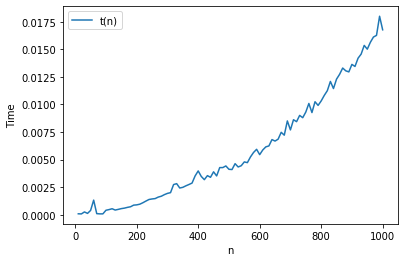

In [59]:
n_list = np.linspace(10, 1000, num=100, dtype=int)

timetorun = []

for nval in n_list:
    t0 = time.time()
    generate_g(nval)
    time_elapsed = time.time() - t0
    timetorun.append(time_elapsed)

plt.ylabel("Time")
plt.xlabel("n")
plt.plot(n_list, timetorun, label='t(n)')
plt.legend()
plt.show()



Graphically, it does appear that $t(n) ∼ \alpha n^\beta$. To verify, we determine $\alpha$ and $\beta$ to see if they are reasonable, and plot that curve against the original:

In [60]:
def func(n_list, a, b):
    return a * (n_list**b)

popt, pcov = scipy.optimize.curve_fit(func, n_list, timetorun)

alpha = popt[0]
beta = popt[1]

print("alpha is", alpha)
print("beta is", beta)

alpha is 2.1153213433911847e-08
beta is 1.9662162524500943


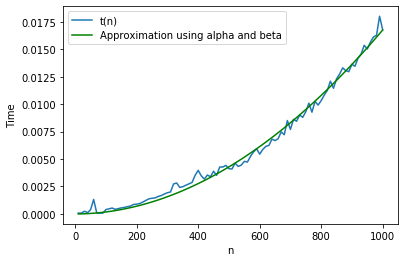

In [62]:

plt.ylabel("Time")
plt.xlabel("n")
plt.plot(n_list, timetorun, label='t(n)')
plt.plot(n_list, alpha*n_list**beta, 'green', label='Approximation using alpha and beta')
plt.legend()
plt.show()

The above plot verifies that $t(n) ∼ \alpha n^\beta$. 

The value of beta (~2) is reasonable, because in generating an $nxn$ matrix, my generate_g function must produce values for $n$ columns and $n$ rows, so it's doing operations on the order of $n^2$, and is thus an $O(n^2)$ algorithm. 


## 4c)
For $n = 10,20,...,200$, we set $x = [1,1,...,1]^T \in {\rm I\!P}^n$ and construct a right-hand side vector $b = G_nx$. We then solve the system $G_n\hat{x} = b$ using the LU factorization. 

This allows us to plot the 2-norm relative error for the original $x$ and the result of LU factorization $\hat{x}$. See that plot below. 

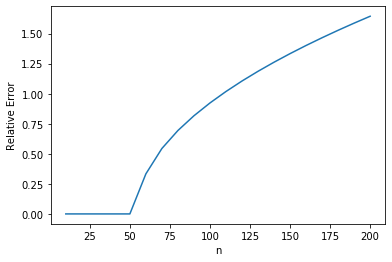

In [67]:
n_list = np.linspace(10, 200, num=20, dtype=int)

two_norm = []

for n in n_list:
    x = np.ones((1,n)).T
    G_n = generate_g(n)
    b = G_n.dot(x)
    x_hat = np.linalg.solve(G_n, b)
    x_norm_diff = np.linalg.norm(x-x_hat)
    x_hat_norm = np.linalg.norm(x_hat)
    relative_error = (x_norm_diff)/x_hat_norm
    two_norm.append(relative_error)

    
plt.plot(n_list, two_norm)
plt.ylabel("Relative Error")
plt.xlabel("n")
plt.show()

Since NumPy's "linalg.solve" function uses Gaussian elimination with partial pivoting under the hood, we can see that the given case is one where we consider Gaussian elimination with partial pivoting to be numerically unstable. 

To better understand the reason behind this, we can (using LU factorization) print out the upper triangular matrix $U$ that the solver uses in its intermediary steps for each iteration of n.

In [154]:
n_list = np.linspace(10, 200, num=20, dtype=int)
two_norm = []

for n in n_list:
    x = np.ones((1,n)).T
    G_n = generate_g(n)
    b = G_n.dot(x)
    P, L, U = scipy.linalg.lu(G_n)
    print("n is", n, '\n', U)
    x_hat = np.linalg.solve(G_n, b)
    x_norm_diff = np.linalg.norm(x-x_hat)
    x_hat_norm = np.linalg.norm(x_hat)
    relative_error = (x_norm_diff)/x_hat_norm
    two_norm.append(relative_error)

n is 10 
 [[  1.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   8.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.  16.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.  32.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.  64.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0. 128.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1. 256.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 512.]]
n is 20 
 [[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.

We can see that the elements in right-hand column of the $U$ matrix explode as you go down the rows, ending at $512 = 2^9$ for $n = 10$ and $524,288 = 2^{19}$ for $n = 20$. We can generalize this to recognize that the bottom-right element of every $U$ matrix will be $2^{n-1}$. It is between $n=50$ and $n=60$ where we see the relative error drastically increase, and that corresponds to the point at which $2^{n-1}$ and thus the terms on the far-right column surpass the magnitude $10^{16}$, which we recognize as the order of magnitude where errors from rounding errors due to the limits of machine precision usually kick in. 

When performing the reverse substitution to solve $Ux = y$, the addition of a 1 to our massive lower-right term gets lost (due to rounding errors from limits of our machine's precision). So the value of $\hat{x}$ corresponding to that element is set to 0, instead of 1. As $n$ grows, the number of $\hat{x}$ elements that are 0 instead of 1 also grow. The difference between $x$ and $\hat{x}$ increases, and so does the relative error.

## 6a)

In [155]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy import linalg


# Load in the leaf images

leaf_list = []
for i in range(143):
    file = "./leaves/leaf"+"{:03d}".format(i)+".png"
    image = io.imread(file).astype(np.float64)/255.
    leaf_list.append(image)
    
# For subtractive color mixing, convert from RGB to CMY
Sleaf_list = []
for leaf in leaf_list:
    Sleaf = np.zeros((420, 534, 3))
    #C component
    Sleaf[:,:,0] = 1 - leaf[:,:,0]
    #M component
    Sleaf[:,:,1] = 1 - leaf[:,:,1]
    #Y component
    Sleaf[:,:,2] = 1 - leaf[:,:,2]
    Sleaf_list.append(Sleaf)

Having imported the images and converted to CMY representation, we compute the average leaf vector. The code for that computation and plot of the result is below.

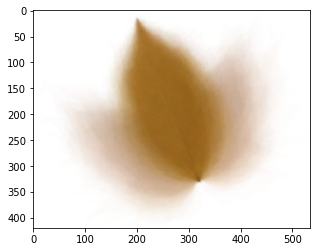

In [156]:
# Function to create average leaf vector
def avgleafvector_S(Sleaf_list):
    Sleaf_Csum = np.zeros((224280,1))
    Sleaf_Msum = np.zeros((224280,1))
    Sleaf_Ysum = np.zeros((224280,1))
    for Sleaf in Sleaf_list:
        Sleaf_Csum += Sleaf[:,:,0].reshape(224280,1)
        Sleaf_Msum += Sleaf[:,:,1].reshape(224280,1)
        Sleaf_Ysum += Sleaf[:,:,2].reshape(224280,1)
        
    Sleaf_Cavg = Sleaf_Csum/len(Sleaf_list)
    Sleaf_Mavg = Sleaf_Msum/len(Sleaf_list)
    Sleaf_Yavg = Sleaf_Ysum/len(Sleaf_list)
    
    Sleaf_CMY_avg = np.concatenate((Sleaf_Cavg, Sleaf_Mavg, Sleaf_Yavg), axis=1)
    
    return Sleaf_CMY_avg

# Call the function to generate the CMY average vector of the leaf images. 
Sleaf_CMY_avg = avgleafvector_S(Sleaf_list)

# Convert back from CMY to RGB to get the average leaf. 
# Without converting, leaf will be a negative of desired images. 
Sleaf_CMY_avg_fullpic = np.reshape(Sleaf_CMY_avg, (420, 534, 3))
Sleaf_avg_fullpic = 1 - Sleaf_CMY_avg_fullpic

# To see negative leaf, uncomment the next two lines:
# plt.imshow(Sleaf_CMY_avg_fullpic)
# plt.show()

#Plot the result
plt.imshow(Sleaf_avg_fullpic)
plt.show()

## 6b)
Below is the code to assemble a matrix $A$ of size $3mn x L$ where each column $A_{:,j}$ is given by ${\bf S}_j - \bar{\bf S}$. 

In [157]:
def Sleaf_minus_Sleafavg_matrix(Sleaf_list, Sleaf_CMY_avg_fullpic):
    
    matrix = np.zeros((672840, len(Sleaf_list)))
    Sleaf_avg_col = Sleaf_CMY_avg_fullpic.reshape(672840,1)
    
    j = 0
    
    for Sleaf in Sleaf_list:
        Sleaf_col = Sleaf.reshape(672840,1)
        Sleaf_diff = Sleaf_col - Sleaf_avg_col
        matrix[:,j:j+1] = Sleaf_diff
        j += 1
    
    return matrix

Smatrix = Sleaf_minus_Sleafavg_matrix(Sleaf_list, Sleaf_CMY_avg_fullpic)




We can then perform the reduced singular value decomposition of A, as below. 

In [158]:
# We put this in its own cell since it is computationally expensive, 
# so we want to minimize the amount of times we run it. 
u, s, vh = np.linalg.svd(Smatrix, full_matrices=False)

Now define $c_j = \text{min}_iu_{i,j}$ and $d_j = \text{max}_iu_{i,j}$, and then define scalped positive and negative components as:

$u_{i,j}^P = \text{max}\{0, \frac{u_{i,j}}{d_j}\}$

and 

$u_{i,j}^N = \text{max}\{0, \frac{u_{i,j}}{c_j}\}$

respectively. 

The plots (as images) for $u_{i,j}^P$ and $j = 1,2,3$ are below:

Plot for u_p, j = 1 (which corresponds to the 0th column in Python)


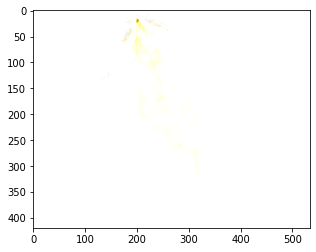

Plot for u_p, j = 2 (which corresponds to the 1st column in Python)


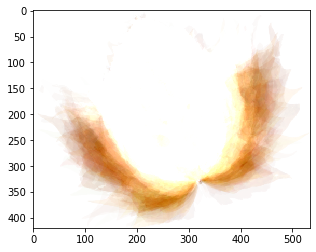

Plot for u_p, j = 3 (which corresponds to the 2nd column in Python)


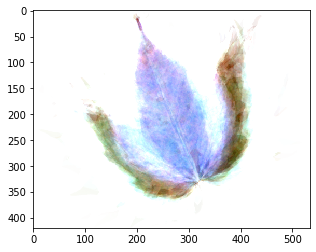

In [159]:
c_j = np.min(u, axis=0)
d_j = np.max(u, axis=0)

u_p = np.maximum(0, (u/d_j))
u_n = np.maximum(0, (u/c_j))


# for u_p and j=1 (which corresponds to the 0th column in Python)
up_image_col_one = u_p[:, 0:1]
up_image_fullpic_one = np.reshape(up_image_col_one, (420, 534, 3))

print("Plot for u_p, j = 1 (which corresponds to the 0th column in Python)")
plt.imshow(1 - up_image_fullpic_one)
plt.show()

# for u_p and j=2 (which corresponds to the 1st column in Python)
up_image_col_two = u_p[:, 1:2]
up_image_fullpic_two = np.reshape(up_image_col_two, (420, 534, 3))

print("Plot for u_p, j = 2 (which corresponds to the 1st column in Python)")
plt.imshow(1 - up_image_fullpic_two)
plt.show()

# for u_p and j=3 (which corresponds to the 2nd column in Python)
up_image_col_three = u_p[:, 2:3]
up_image_fullpic_three = np.reshape(up_image_col_three, (420, 534, 3))

print("Plot for u_p, j = 3 (which corresponds to the 2nd column in Python)")
plt.imshow(1 - up_image_fullpic_three)
plt.show()

The plots (as images) for $u_{i,j}^N$ and $j = 1,2,3$ are below:

Plot for u_n, j = 1 (which corresponds to the 0th column in Python)


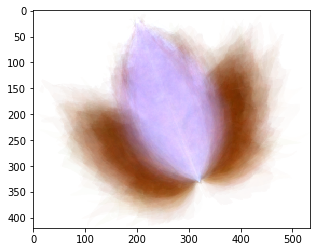

Plot for u_n, j = 2 (which corresponds to the 1st column in Python)


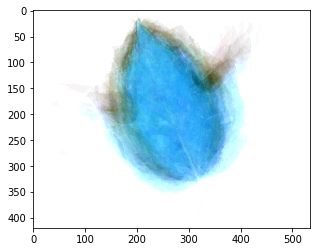

Plot for u_n, j = 3 (which corresponds to the 2nd column in Python)


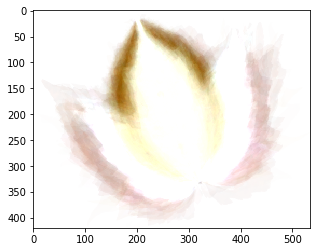

In [160]:
# for u_n and j=1 (which corresponds to the 0th column in python)
un_image_col_one = u_n[:, 0:1]
un_image_fullpic_one = np.reshape(un_image_col_one, (420, 534, 3))

print("Plot for u_n, j = 1 (which corresponds to the 0th column in Python)")
plt.imshow(1 - un_image_fullpic_one)
plt.show()

# for u_n and j=2 (which corresponds to the 1st column in python)
un_image_col_two = u_n[:, 1:2]
un_image_fullpic_two = np.reshape(un_image_col_two, (420, 534, 3))

print("Plot for u_n, j = 2 (which corresponds to the 1st column in Python)")
plt.imshow(1 - un_image_fullpic_two)
plt.show()

# for u_n and j=3 (which corresponds to the 2nd column in python)
un_image_col_three = u_n[:, 2:3]
un_image_fullpic_three = np.reshape(un_image_col_three, (420, 534, 3))

print("Plot for u_n, j = 3 (which corresponds to the 2nd column in Python)")
plt.imshow(1 - un_image_fullpic_three)
plt.show()

## 6c)

Below is the code for generating ${\rm I\!P}(\bf{T} - k)$, the closest point projection of the image $\bf{T}$ onto the subspace centered on $\bar{\bf{S}}$ and spanned by the first $k$ left singular vectors:

In [161]:
def projection(T, k):
    Sleaf_avg_col = Sleaf_CMY_avg_fullpic.reshape(672840,1)
    
    sum_term = np.zeros((672840, 1))
    for j in range(k):
        bracket_term = np.dot(u[:,j:j+1].T, (T - Sleaf_avg_col))
        sum_piece = bracket_term * u[:,j:j+1]
        sum_term += sum_piece
    
    P = Sleaf_avg_col + sum_term
    
    return P


Now we choose a random leaf image (in this case I chose leaf \#27) and plot ${\rm I\!P}(\bf{T} - k)$ as an image for $k = 1,2,4,8,16$. 

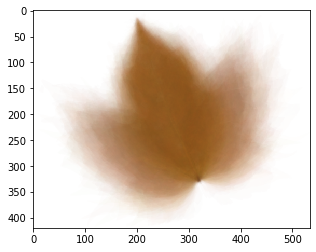

In [162]:
# for k=1, and leaf #27
Sleaf_col = Sleaf_list[27].reshape(672840,1)

P = projection(Sleaf_col, 1)
P_full = np.reshape(P, (420, 534, 3))

#clip data to the range [0,1]
P_full[P_full < 0] = 0
P_full[P_full > 1] = 1

plt.imshow(1 - P_full)
plt.show()

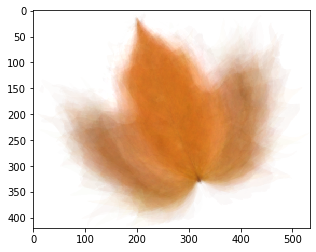

In [163]:
# for k=2

P = projection(Sleaf_col, 2)
P_full = np.reshape(P, (420, 534, 3))

#clip data to the range [0,1]
P_full[P_full < 0] = 0
P_full[P_full > 1] = 1

plt.imshow(1 - P_full)
plt.show()

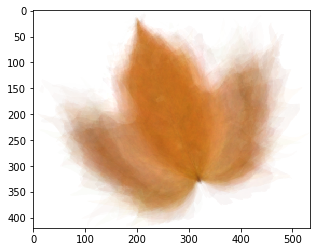

In [164]:
# for k=4

P = projection(Sleaf_col, 4)
P_full = np.reshape(P, (420, 534, 3))

#clip data to the range [0,1]
P_full[P_full < 0] = 0
P_full[P_full > 1] = 1

plt.imshow(1 - P_full)
plt.show()

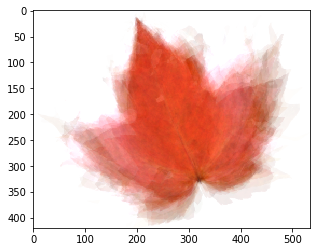

In [165]:
# for k=8

P = projection(Sleaf_col, 8)
P_full = np.reshape(P, (420, 534, 3))

#clip data to the range [0,1]
P_full[P_full < 0] = 0
P_full[P_full > 1] = 1

plt.imshow(1 - P_full)
plt.show()

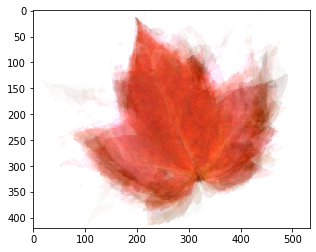

In [166]:
# for k=16

P = projection(Sleaf_col, 16)
P_full = np.reshape(P, (420, 534, 3))

#clip data to the range [0,1]
P_full[P_full < 0] = 0
P_full[P_full > 1] = 1

plt.imshow(1 - P_full)
plt.show()

So we note that the quality of the image improves as $k$ is increased. 

## 6d)
We now plot the distance of each leaf from its projection.  

In [167]:

#Distance of each leaf from its projection

dis_list = []

for j in range(len(Sleaf_list)):
    
    Sleaf_col = Sleaf_list[j].reshape(672840,1)
    norm = np.linalg.norm(Sleaf_col - projection(Sleaf_col, 8))
    
    dis = 1/(224280) * (norm)**2
    
    dis_list.append(dis)
    

j_lo = np.argmin(dis_list)
j_hi = np.argmax(dis_list)



j_lo is 57
j_hi is 120
The leaf corresponding to j_lo is:


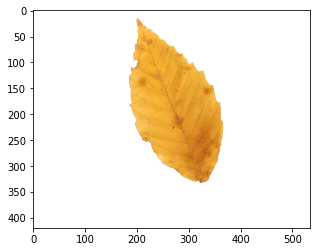

The corresponding projection for j_lo is:


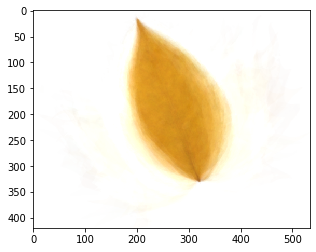

The leaf corresponding to j_hi is:


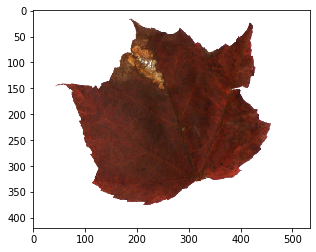

The corresponding projection for j_hi is:


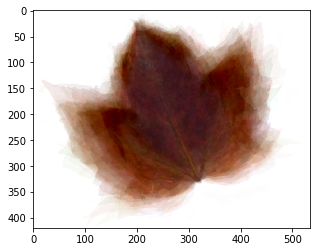

In [170]:
print("j_lo is", j_lo)
print("j_hi is", j_hi)

jlo_Sleaf_col = Sleaf_list[j_lo].reshape(672840,1)

print("The leaf corresponding to j_lo is:")
plt.imshow(1 - Sleaf_list[j_lo])
plt.show()

Plo = projection(jlo_Sleaf_col, 8)
Plo_full = np.reshape(Plo, (420, 534, 3))
#clip data to the range [0,1]
Plo_full[Plo_full < 0] = 0
Plo_full[Plo_full > 1] = 1
print("The corresponding projection for j_lo is:")
plt.imshow(1 - Plo_full)
plt.show()

jhi_Sleaf_col = Sleaf_list[j_hi].reshape(672840,1)
print("The leaf corresponding to j_hi is:")
plt.imshow(1 - Sleaf_list[j_hi])
plt.show()

Phi = projection(jhi_Sleaf_col, 8)
Phi_full = np.reshape(Phi, (420, 534, 3))
#clip data to the range [0,1]
Phi_full[Phi_full < 0] = 0
Phi_full[Phi_full > 1] = 1
print("The corresponding projection for j_hi is:")
plt.imshow(1 - Phi_full)
plt.show()

This matches our expectiaton. Since $\text{dis}(\bf S_j$) is the distance from each leaf to its projection, we know know that a leaf matches its projection well if that number is small. And since the projection itself is larger when $T$ is further from $\bar {\bf S}$ (since the projection depends on a sum over $T - \bar {\bf S}$, leaves that are further from the average will have a greater projection, and thus a greater $\text{dis}(\bf S_j$). The opposite will be true for leaves that are close to the average. 

So we are not surprised to see that the leaf corresponding to $j_{lo}$ very similar to our average leaf found above, and that the leaf corresponding to $j_hi$ is very different from our average leaf found above. 

## 6e)

Using the following code, we find that the leaves with the lowest $dis(\bf{R}_j)$ values are leaf \#0, leaf \#4, and leaf \#5. So we predict that these three came from the New Hampshire site. 

In [171]:

# Read in the new leaves

extra_leaf_list = []
for i in range(8):
    file = "./leaves_extras/extra/leaf"+"{:03d}".format(i+143)+".png"
    image = io.imread(file).astype(np.float64)/255.
    extra_leaf_list.append(image)
    
extra_Sleaf_list = []
for leaf in extra_leaf_list:
    extra_Sleaf = np.zeros((420, 534, 3))
    #C component
    extra_Sleaf[:,:,0] = 1 - leaf[:,:,0]
    #M component
    extra_Sleaf[:,:,1] = 1 - leaf[:,:,1]
    #Y component
    extra_Sleaf[:,:,2] = 1 - leaf[:,:,2]
    extra_Sleaf_list.append(extra_Sleaf)

In [172]:

#Find the dis values for each leaf. 

extra_dis_list = []

for j in range(len(extra_Sleaf_list)):
    
    Sleaf_col = extra_Sleaf_list[j].reshape(672840,1)
    norm = np.linalg.norm(Sleaf_col - projection(Sleaf_col, 8))
    
    dis = 1/(224280) * (norm)**2
    
    extra_dis_list.append(dis)
    
for i in range(len(extra_dis_list)):
    print("Leaf #{} has dis value {}".format(i, extra_dis_list[i]))

Leaf #0 has dis value 0.019383617265358092
Leaf #1 has dis value 0.02766730337027605
Leaf #2 has dis value 0.03659006439289715
Leaf #3 has dis value 0.03974862196481208
Leaf #4 has dis value 0.024933894319557403
Leaf #5 has dis value 0.026952404562737536
Leaf #6 has dis value 0.042244190930224426
Leaf #7 has dis value 0.054162045575335514


Citation:
For this problem set, I spoke with Simon Warchol, Kaela Nelson, Michael Downs, and Rylan Schaeffer.